# Degree distribution plot

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

from utils import (load_nw_hi_iii,
                   load_nw_lit_bm_17,
                   load_nw_bioplex,
                   load_nw_cofrac,
                   load_nw_qubic,
                   degree_distribution_plot)
from custom_settings import *

In [2]:
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 7.0
mpl.rcParams['savefig.dpi'] = 500

In [3]:
hi = load_nw_hi_iii()
bp = load_nw_bioplex(id_type='ensembl_gene_id')
qb = load_nw_qubic(id_type='ensembl_gene_id')
cf = load_nw_cofrac(id_type='ensembl_gene_id')
lit = load_nw_lit_bm_17()
nws = [hi, bp, qb, cf, lit]
cols = [HURI_COLOR, BIOPLEX_COLOR, QUBIC_COLOR, COFRAC_COLOR, LIT_COLOR]
names = ['HuRI', 'BioPlex', 'QUBIC', 'CoFrac', 'Lit-BM']

/Users/lukelambourne/Work/HuRI_paper/notebooks/utils.py:447: UserWarning: Warning: mapping between gene/protein identifiers has resulted in different pairs in the input ID being mapped to the same pair in the output ID.
You may wish to use the `agg` argument to customize the choice of which of the pair's infomation to keep or how to combine the information from multiple pairs.
  warnings.warn('Warning: mapping between gene/protein identifiers has '


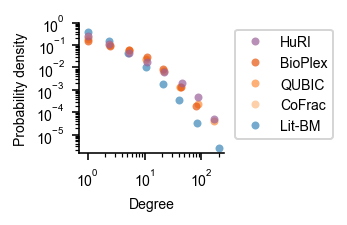

In [4]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(1.3, 1.2)
for i, (nw, col, name) in enumerate(zip(nws, cols, names)):
    degree_distribution_plot(nw, 
                             id_a='ensembl_gene_id_a',
                             id_b='ensembl_gene_id_b',
                             color=col,
                             label=name,
                             ax=ax,
                             markersize=4,
                             alpha=0.7,
                             markeredgewidth=0,
                             zorder=-i)
ax.set_xlim((0.7, 250))
ax.set_ylim((0.0000015, 1.))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticks([10**-i for i in range(6)])
ax.set_yticks(list(np.arange(0.1, 1, 0.1)) +
              list(np.arange(0.01, 0.1, 0.01)) +
              list(np.arange(0.001, 0.01, 0.001)) +
              list(np.arange(0.0001, 0.001, 0.0001)) +
              list(np.arange(0.00001, 0.0001, 0.00001)) +
              list(np.arange(0.000002, 0.00001, 0.000001)),
              minor=True)
ax.set_xticks([10**i for i in range(3)])
ax.set_xticks(list(range(1, 10, 1)) +
              list(range(10, 100, 10)) +
              [200],
              minor=True)
ax.set_xticklabels([], minor=True)
ax.legend(loc=1,
          bbox_to_anchor=[1.8, 1.])
for fmt in FORMATS:
    plt.savefig('../figures/degree_distributions' + fmt,
                bbox_inches='tight')

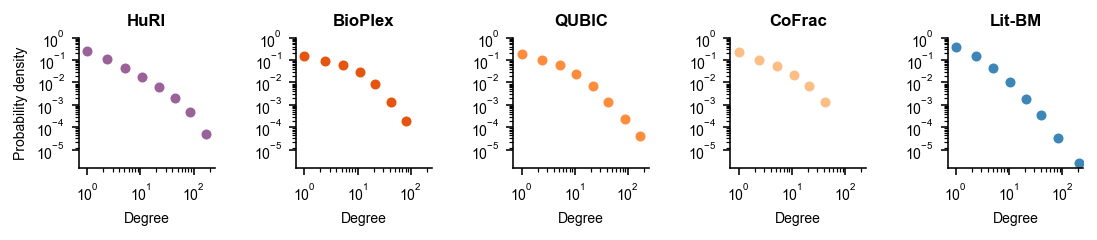

In [5]:
# All ccsbplotlib take an optional 'ax' keyword argument that accepts a matplotlib Axes
# This can be used to make multipanel plots
fig, axes = plt.subplots(1, 5)
fig.set_size_inches(9., 1.2) 
for nw, ax, col, name in zip(nws, axes.flatten(), cols, names):
    degree_distribution_plot(nw, 
                             ax=ax,
                             id_a='ensembl_gene_id_a',
                             id_b='ensembl_gene_id_b',
                             color=col,
                             label=name,
                             markersize=4)
    ax.set_xlim((0.7, 250))
    ax.set_ylim((0.0000015, 1.))
    ax.set_title(name, fontweight='bold')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_yticks([10**-i for i in range(6)])
    ax.set_yticks(list(np.arange(0.1, 1, 0.1)) +
                  list(np.arange(0.01, 0.1, 0.01)) +
                  list(np.arange(0.001, 0.01, 0.001)) +
                  list(np.arange(0.0001, 0.001, 0.0001)) +
                  list(np.arange(0.00001, 0.0001, 0.00001) +
                  list(np.arange(0.000002, 0.00001, 0.000001))),
                  minor=True)
    ax.set_xticks([10**i for i in range(3)])
    ax.set_xticks(list(range(1, 10, 1)) +
                  list(range(10, 100, 10)) +
                  [200],
                  minor=True)
    ax.set_xticklabels([], minor=True)
    ax.set_yticklabels([], minor=True)
#axes[0, 0].set_xlabel('')
#axes[0, 1].set_xlabel('')
for i in range(1, len(axes)):
    axes[i].set_ylabel('')
plt.subplots_adjust(wspace=0.6)
for fmt in FORMATS:
    plt.savefig('../figures/degree_distributions_facet' + fmt,
                bbox_inches='tight')